# Lecture 3

(Summer 2023)

## Outline of topics for this segment:

1. Anatomy of a Plot (Sneha Jha)
2. Array indexing
3. SciPy and numerical linear algebra
4. Least squares
5. Random numbers
6. The Chutes and Ladders Game


In [1]:
import math
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.linalg as la

## Anatomy of a Plot (Sneha Jha)

## Arrays and indexing
We are going to need to use some of python's array indexing and slicing capabilities below. Therefore, we introduce them here.

In [2]:
# Make an example one-dimensional array and fill it with random 
# integers. As used below the integers are between 0 and 9. The
# array size is 20. The first entry in the array is x[0] and the last
# is x[19]

x1 = np.random.randint(10, size=20)
print(x1)
print(x1[0])
print(x1[5])

[4 4 7 5 5 6 2 9 1 7 3 7 4 4 2 6 2 0 8 2]
4
6


In [3]:
# The "shape" method shows that x1 is a one-dimensional array of
# length 20
print(x1.shape)
print(len(x1))

(20,)
20


## Array slicing
This capability allows a simple way to access subarrays contained inside of an array. The notation uses the `:` operator. To access a slice of a **one-dimensional** array:

- x1[start:stop:step]

where

- start is the beginning index (default if unspecified: start = 0)
- stop is the ending index plus 1 (default if unspecified: stop = len(x1))
- step is the spacing (default if unspecified: step = 1)

In [4]:
x1

array([4, 4, 7, 5, 5, 6, 2, 9, 1, 7, 3, 7, 4, 4, 2, 6, 2, 0, 8, 2])

In [5]:
x1[1:11]

array([4, 7, 5, 5, 6, 2, 9, 1, 7, 3])

In [6]:
# Every other entry starting from second entry and ending by the
# 11th
x1[1:11:2]

array([4, 5, 6, 9, 7])

In [7]:
# Ditto but every third
x1[1:11:3]

array([4, 5, 9, 3])

In [8]:
# Starting from first entry
x1[:11]

array([4, 4, 7, 5, 5, 6, 2, 9, 1, 7, 3])

In [9]:
# Another way to get the entire array. Useful with multidimensional
# arrays
x1[:]

array([4, 4, 7, 5, 5, 6, 2, 9, 1, 7, 3, 7, 4, 4, 2, 6, 2, 0, 8, 2])

In [10]:
# Every other entry starting from first (i.e., even indices)
x1[::2]

array([4, 7, 5, 2, 1, 3, 4, 2, 2, 8])

In [11]:
# Every other entry starting from second (i.e., odd indices)
x1[1::2]

array([4, 5, 6, 9, 7, 7, 4, 6, 0, 2])

## Two-dimensional arrays

In [12]:
# Now generalize to matrix (a.k.a., a two-dimensional array).
x2 = np.random.randint(10, size=(10,10))
print(x2)

[[4 3 8 4 2 9 6 9 4 5]
 [2 2 1 4 3 5 6 6 7 0]
 [8 1 6 7 6 1 1 0 1 6]
 [7 0 4 7 7 9 5 0 1 3]
 [2 2 4 9 0 4 8 3 1 0]
 [0 8 5 0 4 1 3 3 5 1]
 [6 4 5 3 8 9 4 8 8 0]
 [0 5 2 6 3 6 3 7 4 7]
 [4 4 6 2 2 0 4 8 8 1]
 [5 7 5 8 4 0 9 7 9 4]]


In [13]:
# How to address an individual entry in x2 ...
x2[2,4]

6

In [14]:
# How to address the individual rows of x2 ...
x2[2,:]

array([8, 1, 6, 7, 6, 1, 1, 0, 1, 6])

In [15]:
# How to address the individual columns of x2
x2[:,1]

array([3, 2, 1, 0, 2, 8, 4, 5, 4, 7])

### Notice how numpy treats the row and column arrays as 1D arrays. In otherwords, it does not keep track of the difference between a row and a column of a matrix ...

In [16]:
# How to extract a sub-array
x2[1:3,2:4]

array([[1, 4],
       [6, 7]])

In [17]:
# Just to see the original
x2

array([[4, 3, 8, 4, 2, 9, 6, 9, 4, 5],
       [2, 2, 1, 4, 3, 5, 6, 6, 7, 0],
       [8, 1, 6, 7, 6, 1, 1, 0, 1, 6],
       [7, 0, 4, 7, 7, 9, 5, 0, 1, 3],
       [2, 2, 4, 9, 0, 4, 8, 3, 1, 0],
       [0, 8, 5, 0, 4, 1, 3, 3, 5, 1],
       [6, 4, 5, 3, 8, 9, 4, 8, 8, 0],
       [0, 5, 2, 6, 3, 6, 3, 7, 4, 7],
       [4, 4, 6, 2, 2, 0, 4, 8, 8, 1],
       [5, 7, 5, 8, 4, 0, 9, 7, 9, 4]])

In [18]:
# Subarray with every other row and column (even) 
x2[::2,::2]

array([[4, 8, 2, 6, 4],
       [8, 6, 6, 1, 1],
       [2, 4, 0, 8, 1],
       [6, 5, 8, 4, 8],
       [4, 6, 2, 4, 8]])

In [19]:
# Subarray with every other row and column (odd)
x2[1::2,1::2]

array([[2, 4, 5, 6, 0],
       [0, 7, 9, 0, 3],
       [8, 0, 1, 3, 1],
       [5, 6, 6, 7, 7],
       [7, 8, 0, 7, 4]])

## Numerical Linear Algebra

Python is often used for operations associated with systems of linear equations. `Numpy` is a package that is useful for representing the arrays that hold: 1) the coefficient matrix defining the equations, 2) the column vector defining the unknown variables, and 3) the column vector holding the right-hand side of the matrix equation.

There is also a package called `SciPy` which is useful for solving the equations.

### 1D and 2D Arrays

In [20]:
a = np.array([1, 3, -2, 1])
print(a)
print(f'The number of dimensions is: {a.ndim}')
print(f'The shape of the array is: {a.shape}')
print(f'The size of the array is: {a.size}')

[ 1  3 -2  1]
The number of dimensions is: 1
The shape of the array is: (4,)
The size of the array is: 4


In [21]:
M = np.array([[1, 2], [3, 7], [-1, 5]])
print(M)
print(f'The number of dimensions is: {M.ndim}')
print(f'The shape of the array is: {M.shape}')
print(f'The size of the array is: {M.size}')

[[ 1  2]
 [ 3  7]
 [-1  5]]
The number of dimensions is: 2
The shape of the array is: (3, 2)
The size of the array is: 6


In [22]:
# Selecting rows and/or columns from a 2D array produces 1D arrays
col = M[:,1]
print(col)
print(f'The number of dimensions is: {col.ndim}')
print(f'The shape of the column is: {col.shape}')
print(f'The size of the column is: {col.size}')
print()
row = M[1,:]
print(row)
print(f'The number of dimensions is: {row.ndim}')
print(f'The shape of the row is: {row.shape}')
print(f'The size of the row is: {row.size}')

[2 7 5]
The number of dimensions is: 1
The shape of the column is: (3,)
The size of the column is: 3

[3 7]
The number of dimensions is: 1
The shape of the row is: (2,)
The size of the row is: 2


### In both cases we ended up with a 1D array when sampling the 2D array. If we really want the column vector to be a 2D array, then this can be accomplished using the `reshape` method ...

In [23]:
newcol = col.reshape(3,1)
print(newcol)
print(f'The number of dimensions is: {newcol.ndim}')
print(f'The shape of the column is: {newcol.shape}')
print(f'The size of the column is: {newcol.size}')

[[2]
 [7]
 [5]]
The number of dimensions is: 2
The shape of the column is: (3, 1)
The size of the column is: 3


## Matrix Operations (Elementwise)

The matrix operations `+`, `-`, `/`, `*`, and `**` are performed elementwise on numpy arrays.

In [24]:
print(M)

[[ 1  2]
 [ 3  7]
 [-1  5]]


In [25]:
print(M + M)

[[ 2  4]
 [ 6 14]
 [-2 10]]


In [26]:
print(M * M)

[[ 1  4]
 [ 9 49]
 [ 1 25]]


### Standard matrix multiplication is performed with the `@` operator. The matrix dimensions must work out in order for this to be well-defined ...

In [27]:
A = np.array([[1,3], [2,4], [5, 6]])

print(f'The A matrix is: ')
print(A)
print(f'The shape of the A matrix is: {A.shape}')
print()

B = np.array([[3, 2], [1, 0]])

print(f'The B matrix is: ')
print(B)
print(f'The shape of the B matrix is: {B.shape}')


The A matrix is: 
[[1 3]
 [2 4]
 [5 6]]
The shape of the A matrix is: (3, 2)

The B matrix is: 
[[3 2]
 [1 0]]
The shape of the B matrix is: (2, 2)


In [28]:
# A and B are shaped such that A @ B is defined ...

print(A @ B)

[[ 6  2]
 [10  4]
 [21 10]]


## Examples of Numpy Operations on Matrices ...

### Inner product or dot product

Inner product takes two vectors of equal length and returns a single number computed
as the sum of the element-wise components of the two vectors. For example ...

$$x = [x_1, x_2, x_3, x_4]$$ and $$y = [y_1, y_2, y_3, y_4]$$

Then the inner product of the two vectors is defined as

$$\langle x, y \rangle = \sum_{k=1}^4 x_k y_k$$

In [29]:
# What is the difference between the vectors defined below ... ?

x = np.array([1, 3, -2, 1])
y = np.array([1, 4, 2, 1])
yy = np.array([[1], [4], [2], [1]])
xx = np.array([[1, 3, -2, 1]])


In [30]:
np.dot(x,y)

10

In [31]:
np.inner(x,y)

10

In [32]:
# Inner product as a matrix multiplication

xx @ yy

array([[10]])

In [33]:
# Outer product as matrix multiplication

yy @ xx

array([[ 1,  3, -2,  1],
       [ 4, 12, -8,  4],
       [ 2,  6, -4,  2],
       [ 1,  3, -2,  1]])

### Transpose

The transpose operator should be defined for any matrix. For example ...

$$X = \left[ \begin{array}{rrr} 1 & 0 & -1 \\ 2 & 2 & 4 \end{array} \right]$$

Then the transpose of the matrix is defined to be

$$X^T = \left[ \begin{array}{rr} 1 & 2 \\ 0 & 2 \\ -1 & 4 \end{array} \right]$$

In [34]:
M = np.array([[1, 2], [3, 7], [-1, 5]])
print(M)
print()
print(M.T)

[[ 1  2]
 [ 3  7]
 [-1  5]]

[[ 1  3 -1]
 [ 2  7  5]]


In [35]:
# Two additional ways to get the transpose are ...

print(np.transpose(M))
print()
print(M.transpose())

[[ 1  3 -1]
 [ 2  7  5]]

[[ 1  3 -1]
 [ 2  7  5]]


In [36]:
# Note: When we transpose a one-dimesional numpy array, it doesn't really
# change anything ...

print(np.array([1, 2, 3]))
print()
print(np.array([1, 2, 3]).T)

[1 2 3]

[1 2 3]


In [37]:
# Note the difference ...

print(np.array([[1, 2, 3]]))
print()
print(np.array([[1, 2, 3]]).T)


[[1 2 3]]

[[1]
 [2]
 [3]]


### Trace

The trace is the sum of the diagonal elements of a square matrix ...

$$Trace \left[ \begin{array}{ccc} m_{1,1} & m_{1,2} & m_{1,3} \\ m_{2,1} & m_{2,2} & m_{2,3} \\ m_{3,1} & m_{3,2} & m_{3,3} \end{array} \right] = m_{1,1} + m_{2,2} + m_{3,3}$$

In [38]:
M = np.array([[1, 2, 5], [0, 3, 7], [-1, 5, -2]])
print(M)
print()
print(M.trace())


[[ 1  2  5]
 [ 0  3  7]
 [-1  5 -2]]

2


### Rank

The column rank of a matrix is the dimension of the vector space spanned by its column 
vectors. The row rank of a matrix is the dimension of the vector space spanned by its row vectors.

For a square matrix the row rank and column rank are equal and usually just called the rank
of the matrix.

In [39]:
M = np.array([[1, 2, 5], [0, 3, 7], [-1, 5, -2]])
print(M)
print()
print(np.linalg.matrix_rank(M))

[[ 1  2  5]
 [ 0  3  7]
 [-1  5 -2]]

3


### Inverse Matrix

In [40]:
M = np.array([[1, 2, 5], [0, 3, 7], [-1, 5, -2]])
print(M)
print()
print(np.linalg.inv(M))
print()
print(la.inv(M))

[[ 1  2  5]
 [ 0  3  7]
 [-1  5 -2]]

[[ 1.025 -0.725  0.025]
 [ 0.175 -0.075  0.175]
 [-0.075  0.175 -0.075]]

[[ 1.025 -0.725  0.025]
 [ 0.175 -0.075  0.175]
 [-0.075  0.175 -0.075]]


In [41]:
print(M @ np.linalg.inv(M))

[[ 1.00000000e+00 -5.55111512e-17  1.38777878e-17]
 [ 4.16333634e-17  1.00000000e+00  4.16333634e-17]
 [ 1.94289029e-16  2.22044605e-16  1.00000000e+00]]


## Solving a systems of linear equations ...

`scipy.linalg.solve`

In [42]:
# Work on the problem we wrote on the board before

A = np.array([[2, -1], [1, 1]])
b = np.array([[-3], [4]])
print(A)
print(b)

[[ 2 -1]
 [ 1  1]]
[[-3]
 [ 4]]


In [43]:
x = la.solve(A,b)
print(x)

[[0.33333333]
 [3.66666667]]


In [44]:
# Compare to the above

np.linalg.inv(A) @ b

array([[0.33333333],
       [3.66666667]])

## Use of least-squares to fit best lines to the wheat and corn yield trend data from before ...

In [45]:
# The years for which we have average wheat yield data.
wdates = np.array([2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 
                   2005, 2004, 2003, 2002, 2001, 2000,1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990, 
                   1989, 1988, 1987, 1986, 1985, 1984, 1983, 1982, 1981, 1980, 1979, 1978, 1977, 1976, 1975, 1974, 
                   1973, 1972, 1971, 1970, 1969, 1968, 1967,1966, 1965, 1964, 1963, 1962, 1961, 1960, 1959, 1958, 
                   1957, 1956, 1955, 1954, 1953, 1952, 1951, 1950, 1949, 1948, 1947, 1946, 1945,1944, 1943, 1942, 
                   1941, 1940, 1939, 1938, 1937, 1936, 1935, 1934, 1933, 1932, 1931, 1930, 1929, 1928, 1927, 1926, 
                   1925, 1924, 1923,1922, 1921, 1920, 1919, 1918, 1917, 1916, 1915, 1914, 1913, 1912,1911, 1910, 
                   1909, 1908, 1907, 1906, 1905, 1904, 1903, 1902, 1901,1900, 1899, 1898, 1897, 1896, 1895, 1894, 
                   1893, 1892, 1891, 1890,1889, 1888, 1887, 1886, 1885, 1884, 1883, 1882, 1881, 1880, 1879,1878, 
                   1877, 1876, 1875, 1874, 1873, 1872, 1871, 1870, 1869, 1868, 1867, 1866])


# The average wheat yield data in the order to line up with the corresponding years.
wyields = np.array([44.5, 49.7, 51.7, 47.6, 46.4, 52.7, 43.6, 43.7, 47.1, 46.2, 43.6, 46.1, 44.3, 44.8, 40.2, 
                    38.6, 42. , 43.2, 44.2, 35. , 40.2, 42. , 42.7, 43.2, 39.5, 36.3, 35.8, 37.6, 38.2, 39.3, 
                    34.3, 39.5, 32.7, 34.1, 37.7, 34.4, 37.5, 38.8, 39.4, 35.5, 34.5, 33.5, 34.2, 31.4, 30.7, 
                    30.3, 30.6, 27.3, 31.6, 32.7, 33.9, 31. , 30.6, 28.4, 25.8, 26.3, 26.5, 25.8, 25.2, 25. , 
                    23.9, 26.1, 21.6, 27.5, 21.8, 20.2, 19.8, 18.1, 17.3, 18.4, 16. , 16.5, 14.5, 17.9, 18.2, 
                    17.2, 17. , 17.7, 16.4, 19.5, 16.8, 15.3, 14.1, 13.3, 13.6, 12.8, 12.2, 12.1, 11.2, 13.1, 
                    16.3, 14.2, 13. , 15.4, 14.7, 14.7, 12.8, 16. , 13.3, 13.8, 12.7, 13.5, 12.9, 14.8, 13.2, 
                    11.9, 16.7, 16.1, 14.4, 15.1, 12.4, 13.7, 15.5, 14.3, 14.2, 16. , 15.2, 12.9, 13.7, 14.9, 
                    15. , 12.2, 12.5, 15.2, 14. , 12.8, 13.9, 13.5, 12.4, 14.2, 16.5, 12.2, 14. , 12.1, 13.3, 
                    14.1, 11.4, 14.8, 12.3, 15.1, 11. , 13.2, 13. , 13.5, 14.1, 10.9, 11.1, 13. , 12.9, 11.8, 
                    12.2, 12.1, 13.7, 12.9, 12.6, 11. ])

# The years for which we have average corn yield data.
cdates = np.array([2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 
                   2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990, 
                   1989, 1988, 1987, 1986, 1985, 1984, 1983, 1982, 1981, 1980, 1979, 1978, 1977, 1976, 1975, 1974, 
                   1973, 1972, 1971, 1970, 1969, 1968, 1967, 1966, 1965, 1964, 1963, 1962, 1961, 1960, 1959, 1958, 
                   1957, 1956, 1955, 1954, 1953, 1952, 1951, 1950, 1949, 1948, 1947, 1946, 1945, 1944, 1943, 1942, 
                   1941, 1940, 1939, 1938, 1937, 1936, 1935, 1934, 1933, 1932, 1931, 1930, 1929, 1928, 1927, 1926, 
                   1925, 1924, 1923, 1922, 1921, 1920, 1919, 1918, 1917, 1916, 1915, 1914, 1913, 1912, 1911, 1910, 
                   1909, 1908, 1907, 1906, 1905, 1904, 1903, 1902, 1901, 1900, 1899, 1898, 1897, 1896, 1895, 1894, 
                   1893, 1892, 1891, 1890, 1889, 1888, 1887, 1886, 1885, 1884, 1883, 1882, 1881, 1880, 1879, 1878, 
                   1877, 1876, 1875, 1874, 1873, 1872, 1871, 1870, 1869, 1868, 1867, 1866])

# The average corn yield data in the order to line up with the corresponding years.
cyields = np.array([176.3, 172, 167.5, 176.4, 176.6, 174.6, 168.4, 171, 158.1, 123.1, 146.8, 152.6, 164.4, 
                    153.3, 150.7, 149.1, 147.9, 160.3, 142.2, 129.3, 138.2, 136.9, 133.8, 134.4, 126.7, 
                    127.1, 113.5, 138.6, 100.7, 131.5, 108.6, 118.5, 116.3, 84.6, 119.8, 119.4, 118, 106.7, 
                    81.1, 113.2, 108.9, 91, 109.5, 101, 90.8, 88, 86.4, 71.9, 91.3, 97, 88.1, 72.4, 85.9, 79.5, 80.1,
                    73.1, 74.1, 62.9, 67.9, 64.7, 62.4, 54.7, 53.1, 52.8, 48.3, 47.4, 42, 39.4, 40.7, 41.8, 36.9, 
                    38.2, 38.2, 43, 28.6, 37.2, 33.1, 33, 32.6, 35.4, 31.2, 28.9, 29.9, 27.8, 28.9, 18.6, 24.2, 
                    18.7, 22.8, 26.5, 24.5, 20.5, 25.7, 26.3, 26.4, 25.7, 27.4, 22.1, 27.8, 26.3, 27.8, 29.9, 26.8, 
                    23.9, 26.2, 24.1, 28.1, 25.8, 22.7, 29.1, 24.4, 27.9, 26.1, 26.9, 27.2, 31.7, 30.9, 28.2, 26.9, 
                    28.5, 18.2, 28.1, 28, 26.8, 25.4, 30, 28, 20.2, 23.8, 24.7, 29.6, 22.1, 29.5, 29.1, 21.9, 24.1, 
                    28.6, 28.3, 24.2, 26.5, 19.8, 27.3, 28.2, 26.2, 25.8, 26.7, 27.7, 22.2, 22.9, 29.4, 27.2, 29.3, 
                    21.8, 26.2, 24.7, 24.3])

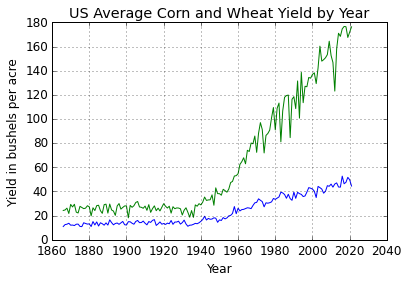

In [46]:
# Plotting the wheat yield trend
fig3 = plt.figure()
plt.style.use('classic')
plt.plot(wdates, wyields)
plt.plot(cdates, cyields)
plt.title("US Average Corn and Wheat Yield by Year")
plt.xlabel("Year")
plt.ylabel("Yield in bushels per acre")
plt.grid()

## The yield improvement trends began around 1940.

Since the first year in the data sets is 1866, the index corresponding to 1940 is 1940 - 1866 = 74. Now shorten up the datasets ...

In [47]:
# The dates and the corresponding yields are all reverse ordered. Let's get them running
# in the normal time order ...

dates = cdates[::-1] # This reverses the array. Note also that cdates and wdates are identical

print('cdates =')
print(cdates)
print()
print('dates =')
print(dates)

cdates =
[2021 2020 2019 2018 2017 2016 2015 2014 2013 2012 2011 2010 2009 2008
 2007 2006 2005 2004 2003 2002 2001 2000 1999 1998 1997 1996 1995 1994
 1993 1992 1991 1990 1989 1988 1987 1986 1985 1984 1983 1982 1981 1980
 1979 1978 1977 1976 1975 1974 1973 1972 1971 1970 1969 1968 1967 1966
 1965 1964 1963 1962 1961 1960 1959 1958 1957 1956 1955 1954 1953 1952
 1951 1950 1949 1948 1947 1946 1945 1944 1943 1942 1941 1940 1939 1938
 1937 1936 1935 1934 1933 1932 1931 1930 1929 1928 1927 1926 1925 1924
 1923 1922 1921 1920 1919 1918 1917 1916 1915 1914 1913 1912 1911 1910
 1909 1908 1907 1906 1905 1904 1903 1902 1901 1900 1899 1898 1897 1896
 1895 1894 1893 1892 1891 1890 1889 1888 1887 1886 1885 1884 1883 1882
 1881 1880 1879 1878 1877 1876 1875 1874 1873 1872 1871 1870 1869 1868
 1867 1866]

dates =
[1866 1867 1868 1869 1870 1871 1872 1873 1874 1875 1876 1877 1878 1879
 1880 1881 1882 1883 1884 1885 1886 1887 1888 1889 1890 1891 1892 1893
 1894 1895 1896 1897 1898 1899 1900 1901 1902 1

In [48]:
# Also reverse the wheat and corn yields

wheat = wyields[::-1]
corn = cyields[::-1]

In [49]:
# Now trim to keep only the data where the increasing yield trends are evident
rdates = dates[74::]
rwheat = wheat[74::]
rcorn = corn[74::]

In [50]:
rdates

array([1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950,
       1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,
       1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
       1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020, 2021])

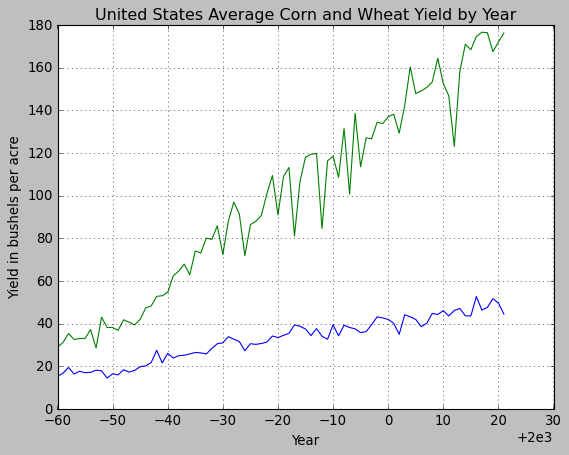

In [51]:
# Plotting the wheat and corn yield trends
fig3 = plt.figure()
plt.style.use('classic')
plt.plot(rdates, rwheat)
plt.plot(rdates, rcorn)
plt.title("United States Average Corn and Wheat Yield by Year")
plt.xlabel("Year")
plt.ylabel("Yield in bushels per acre")
plt.grid()

### Straight Line Fitting via Least Squares ...

<img align="left" src='Data/LS-notes-p1.png' width="700"/>
<img align="left" src='Data/LS-notes-p2.png' width="700"/>

## Exercise: Using the clipped data in the previous cells use least squares to fit lines to the wheat and corn yield data.

Interpret the slopes on the wheat and corn best fit lines

Plot the lines on the graphs from before

Compute the residuals (i.e., the minimum least squares error) and compare

There are single commands in certain Python packages that do least squares fits. Find one and compare.

## A Solution ...

In [52]:
N = len(rdates)
xsum = rdates.sum()
x2sum = np.multiply(rdates,rdates).sum()

wsum = rwheat.sum()
csum = rcorn.sum()
dwsum = np.multiply(rdates,rwheat).sum()
dcsum = np.multiply(rdates,rcorn).sum()

In [53]:
A = np.zeros((2,2))
A[0,0] = N
A[0,1] = xsum
A[1,0] = xsum
A[1,1] = x2sum

In [54]:
bw = np.zeros(2)
bw[0] = wsum
bw[1] = dwsum

In [55]:
bc = np.zeros(2)
bc[0] = csum
bc[1] = dcsum

In [56]:
zw = np.linalg.solve(A, bw)
print(zw)


[-8.01849294e+02  4.21293847e-01]


In [57]:
zc = np.linalg.solve(A, bc)
print(zc)


[-3.64318647e+03  1.88947661e+00]


In [58]:
wline = zw[0] + zw[1]*rdates;
cline = zc[0] + zc[1]*rdates;

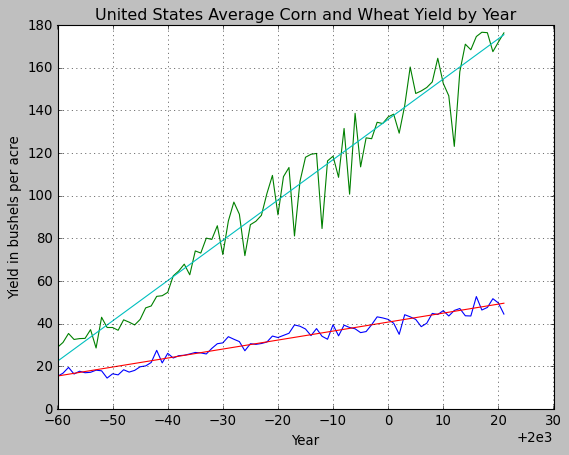

In [59]:
# Plotting the wheat and corn yield trends
fig3 = plt.figure()
plt.style.use('classic')
plt.plot(rdates, rwheat)
plt.plot(rdates, rcorn)
plt.plot(rdates, wline)
plt.plot(rdates, cline)
plt.title("United States Average Corn and Wheat Yield by Year")
plt.xlabel("Year")
plt.ylabel("Yield in bushels per acre")
plt.grid()

## Random Numbers

Please watch the following youtube videos ...


<a href="https://www.youtube.com/watch?v=fEWigU1dcp8" target="_blank">Random Numbers 1 of 2 by Eddie Woo</a>

<a href="https://www.youtube.com/watch?v=PtEivGPxwAI" target="_blank">Random Numbers 2 of 2 by Eddie Woo</a>

In [83]:
# Example of a linear congruential generator

M = 2 ** 32; # The modulus
a = 1664525; # Parameters ...
c = 1013904223

def MyRandInt(Seed, a, c, M):
    Output = (a*Seed + c) % M
    return Output

In [86]:
# Testing it ...

MyRandInt(3, 1664525, 1013904223, 2**32)

1018897798

In [87]:
x = np.zeros(10000)
val = 0;

for k in range(10000):
    newval = MyRandInt(val, 1664525, 1013904223, 2**32);
    val = newval;
    x[k] = val;

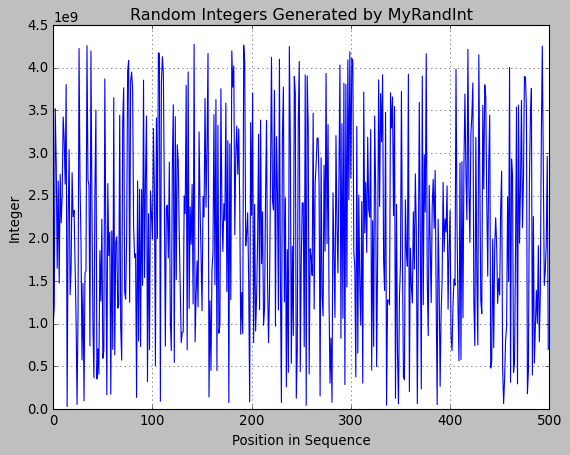

In [89]:
fig3 = plt.figure()
plt.style.use('classic')
plt.plot(x[0:500])
plt.title("Random Integers Generated by MyRandInt")
plt.xlabel("Position in Sequence")
plt.ylabel("Integer")
plt.grid()

In [90]:
# Divide by the modulus to normalize the random
# integers to be uniform on the interval [0, 1)

unif = x/M

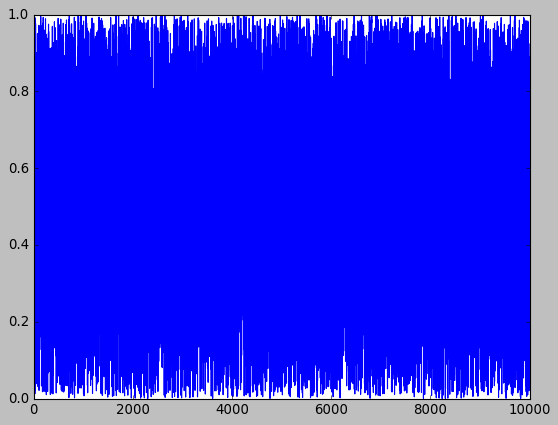

In [91]:
plt.plot(unif)

(array([212., 217., 186., 179., 201., 203., 196., 222., 185., 214., 225.,
        216., 185., 218., 184., 191., 202., 191., 189., 200., 188., 195.,
        207., 186., 203., 201., 190., 200., 194., 193., 190., 216., 208.,
        231., 183., 200., 201., 186., 203., 178., 183., 231., 205., 193.,
        189., 231., 195., 208., 198., 198.]),
 array([7.27167353e-05, 2.00700712e-02, 4.00674257e-02, 6.00647802e-02,
        8.00621346e-02, 1.00059489e-01, 1.20056844e-01, 1.40054198e-01,
        1.60051553e-01, 1.80048907e-01, 2.00046261e-01, 2.20043616e-01,
        2.40040970e-01, 2.60038325e-01, 2.80035679e-01, 3.00033034e-01,
        3.20030388e-01, 3.40027743e-01, 3.60025097e-01, 3.80022452e-01,
        4.00019806e-01, 4.20017161e-01, 4.40014515e-01, 4.60011870e-01,
        4.80009224e-01, 5.00006579e-01, 5.20003933e-01, 5.40001288e-01,
        5.59998642e-01, 5.79995997e-01, 5.99993351e-01, 6.19990705e-01,
        6.39988060e-01, 6.59985414e-01, 6.79982769e-01, 6.99980123e-01,
        7.

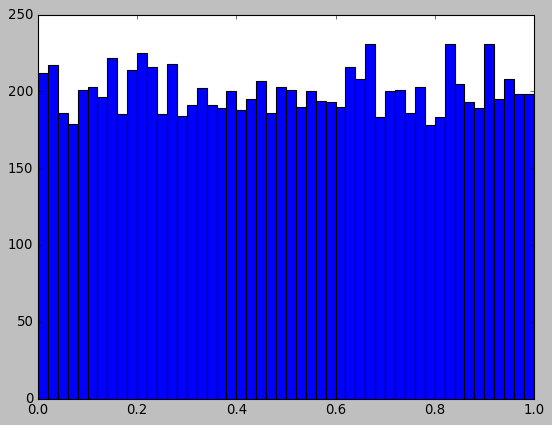

In [92]:
plt.hist(unif, bins=50)

In [93]:
# Compare with the numpy random number generator ...

newunif = np.random.uniform(0, 1, 10000)


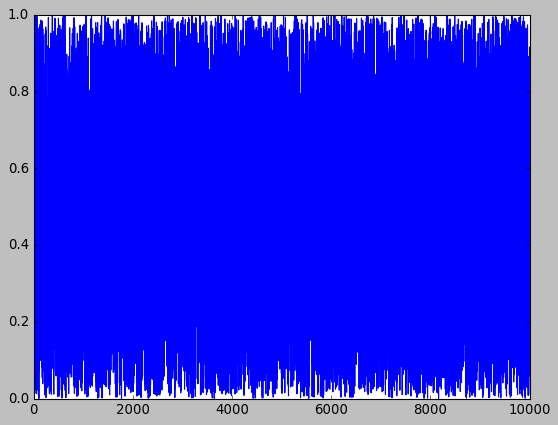

In [94]:
plt.plot(newunif)

(array([218., 218., 178., 211., 204., 196., 200., 209., 208., 204., 200.,
        200., 173., 162., 185., 201., 198., 199., 212., 236., 205., 188.,
        189., 180., 215., 193., 204., 208., 198., 204., 202., 210., 218.,
        179., 199., 233., 208., 189., 188., 218., 195., 178., 184., 189.,
        211., 216., 186., 206., 208., 187.]),
 array([1.46815596e-04, 2.01437806e-02, 4.01407456e-02, 6.01377106e-02,
        8.01346756e-02, 1.00131641e-01, 1.20128606e-01, 1.40125571e-01,
        1.60122536e-01, 1.80119500e-01, 2.00116465e-01, 2.20113430e-01,
        2.40110395e-01, 2.60107360e-01, 2.80104325e-01, 3.00101290e-01,
        3.20098255e-01, 3.40095220e-01, 3.60092185e-01, 3.80089150e-01,
        4.00086115e-01, 4.20083080e-01, 4.40080045e-01, 4.60077010e-01,
        4.80073975e-01, 5.00070940e-01, 5.20067905e-01, 5.40064870e-01,
        5.60061835e-01, 5.80058800e-01, 6.00055765e-01, 6.20052730e-01,
        6.40049695e-01, 6.60046660e-01, 6.80043625e-01, 7.00040590e-01,
        7.

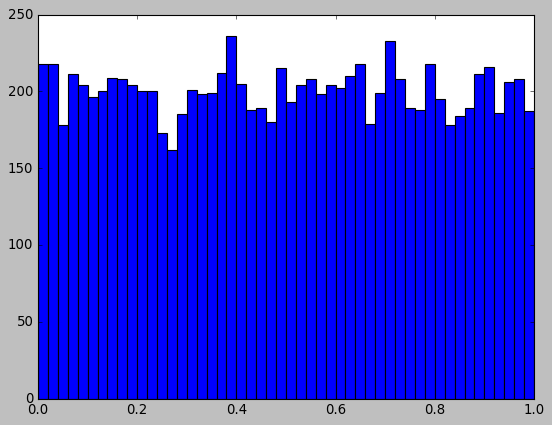

In [95]:
plt.hist(newunif, bins=50)

## The Chutes and Ladders Game ...

Prof. Buckmaster introduced the chutes and ladders game as an example of computing using Excel. The typical game board, containing 100 squares, is shown below.

<img align="left" src='Figs/Chutes&LaddersImage.png' width="500"/>

### Short version of the rules:

1. Assume there are N players, who have been ordered according to the order in which they will play by some random means (e.g., by rolling the dice, drawing straws, etc.)

2. Players all start at position 0.

3. At time k (k = 0, 1, 2, ...) the positions of the N players are indicated by p_n(k) for n = 1, 2, 3, ..., N.

4. Starting with player 1, each player throws a die and adds the value shown on the die to his position, i.e., p_1(k+1) = p_1(k) + {the roll of the die}. Then the player moves to that position on the board. If there is no chute or ladder at the new position, he remains there and his turn ends. On the other hand, if there is a chute or a ladder at the new position, the player must climb the ladder or fall down the chute as the case may be .... this change then yields the new position.

5. The first player to reach position 100 exactly wins the game. If a player rolls the die and computes a new position that would take her past 100, then the roll is voided and she remains at her original position.

In [70]:
# This dictionary stores the chutes and ladders board.
CandLTable = {1:38, 4:14, 9:31, 16:6, 21:42, 28:84, 36:44, 47:26, 49:11, 51:67,
             56:53, 63:19, 64:60, 71:91, 80:100, 87:24, 93:73, 95:75, 98:78}

# The function to make a move
def CandL_make_a_move(position,CandLTable):
    roll = np.random.randint(1,7)
    if position + roll > 100:
        return position
    position += roll
    position = CandLTable.get(position, position)
    return position

### How does the `CandLTable` work?

It is a dictionary, which means a collection of key-value pairs. Here is a link to `methods` that work with dictionaries ... <a href="https://www.w3schools.com/python/python_ref_dictionary.asp" target="_blank">Dictionary Methods</a>.

Let's try a few ...

In [71]:
print(CandLTable.keys())

dict_keys([1, 4, 9, 16, 21, 28, 36, 47, 49, 51, 56, 63, 64, 71, 80, 87, 93, 95, 98])


In [72]:
print(CandLTable.values())

dict_values([38, 14, 31, 6, 42, 84, 44, 26, 11, 67, 53, 19, 60, 91, 100, 24, 73, 75, 78])


In [73]:
print(CandLTable.items())

dict_items([(1, 38), (4, 14), (9, 31), (16, 6), (21, 42), (28, 84), (36, 44), (47, 26), (49, 11), (51, 67), (56, 53), (63, 19), (64, 60), (71, 91), (80, 100), (87, 24), (93, 73), (95, 75), (98, 78)])


In [74]:
# Simplest usage, good for when we know that the referenced key exists ...
CandLTable.get(49)

11

In [75]:
# What happens if the key does not exist in the dictionary?
CandLTable.get(48)

### Nothing happens apparently

In [76]:
# Sometimes you can use print() to force the interpreter to show a value ...
print(CandLTable.get(48))

None


### This is why we need the second argument in the call to the dictionary. It specifies what to return in the case that the key is missing ...

In [77]:
# Specifying a second argument in the call
print(CandLTable.get(48,-1))

-1


### How does `random` work?

Random number generators are covered in many places ... <a href="https://numpy.org/doc/stable/reference/random/index.html?highlight=random%20sampling%20numpy%20random#module-numpy.random" target="_blank">Random Numbers in NumPy</a>.

In [78]:
print(np.random.randint(1,7))

5


In [79]:
np.random.seed(12345)
print(np.random.randint(1,6))
print(np.random.randint(1,6))
print(np.random.randint(1,6))
print(np.random.randint(1,6))
print(np.random.randint(1,6))
print(np.random.randint(1,6))

3
2
5
2
3
2


# Exercise: Program Chutes and Ladders Game

Write a program which plays a game between two people until one wins and produces a record of the game play.

Convert your the single game code into a function and then write a program to play a large number of games one after another keeping a record of who won and how long the game lasted. Then compute statistics and/or histograms.

Finally, explore how changes to the positions of chutes and ladders might change the game.

### Basic Game

Player 2 Wins!!


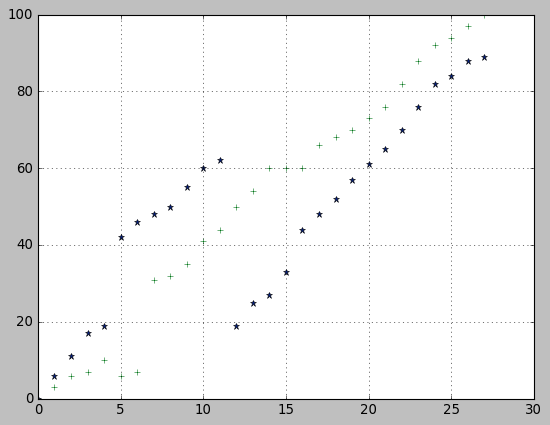

In [100]:
P1 = np.array([0])
P2 = np.array([0])

p1 = 0
p2 = 0

while (p1 < 100 and p2 < 100):
    p1 = CandL_make_a_move(p1, CandLTable)
    p2 = CandL_make_a_move(p2, CandLTable)
    P1 = np.append(P1, p1)
    P2 = np.append(P2, p2)
    if p1 == 100:
        print('Player 1 Wins!!')
    elif p2 == 100:
        print('Player 2 Wins!!')

# This simply plots the positions of the two players over the
# course of the game.
fig3 = plt.figure()
plt.style.use('seaborn-dark-palette')
plt.plot(P1,'*')
plt.plot(P2,'+')
plt.grid()

### Playing many games: Convert the game code above into a function and write a wrapper to play many games ...

### Solution ...

Average number of rounds per game is 26.58
Player 1 won 526 of 1000 games
Player 2 won 474 of 1000 games


(array([ 50.,  80., 139., 130., 142.,  86., 104.,  48.,  50.,  42.,  33.,
         26.,  20.,   6.,  11.,   4.,   8.,   4.,   5.,   3.,   3.,   5.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  7.        ,  10.46666667,  13.93333333,  17.4       ,
         20.86666667,  24.33333333,  27.8       ,  31.26666667,
         34.73333333,  38.2       ,  41.66666667,  45.13333333,
         48.6       ,  52.06666667,  55.53333333,  59.        ,
         62.46666667,  65.93333333,  69.4       ,  72.86666667,
         76.33333333,  79.8       ,  83.26666667,  86.73333333,
         90.2       ,  93.66666667,  97.13333333, 100.6       ,
        104.06666667, 107.53333333, 111.        ]),
 <BarContainer object of 30 artists>)

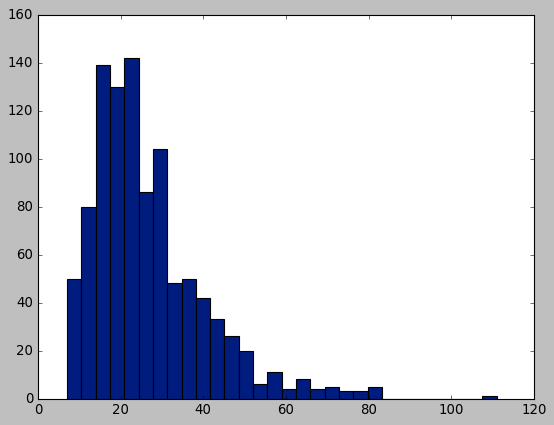

In [81]:
# Convert game code to function

def CandL_play_a_game(CandLTable):
    p1 = 0
    p2 = 0
    Nmoves = 0
    p1wins = 0
    p2wins = 0
    while (p1 < 100 and p2 < 100):
        p1 = CandL_make_a_move(p1, CandLTable)
        p2 = CandL_make_a_move(p2, CandLTable)
        Nmoves += 1
        if p1 == 100:
            p1wins += 1
        elif p2 == 100:
            p2wins += 1
    return Nmoves, p1wins, p2wins
     
Ngames = 1000
Np1wins = 0
Np2wins = 0

GameLengths = np.array([])

for k in range(Ngames):
    L = CandL_play_a_game(CandLTable)
    Np1wins += L[1]
    Np2wins += L[2]
    GameLengths = np.append(GameLengths, L[0])

print('Average number of rounds per game is {:.2f}'.format(np.mean(GameLengths)))
print('Player 1 won {} of {} games'.format(Np1wins,Ngames))
print('Player 2 won {} of {} games'.format(Np2wins,Ngames))

plt.hist(GameLengths, bins=30)

### Modify the table to see it's effect on the game ...

Average number of rounds per game is 86.84
Player 1 won 538 of 1000 games
Player 2 won 462 of 1000 games


(array([123., 186., 149., 102.,  86.,  77.,  53.,  39.,  33.,  35.,  26.,
         17.,  21.,   8.,  13.,   9.,   3.,   3.,   2.,   3.,   7.,   2.,
          0.,   0.,   1.,   0.,   1.,   0.,   0.,   1.]),
 array([ 15. ,  30.1,  45.2,  60.3,  75.4,  90.5, 105.6, 120.7, 135.8,
        150.9, 166. , 181.1, 196.2, 211.3, 226.4, 241.5, 256.6, 271.7,
        286.8, 301.9, 317. , 332.1, 347.2, 362.3, 377.4, 392.5, 407.6,
        422.7, 437.8, 452.9, 468. ]),
 <BarContainer object of 30 artists>)

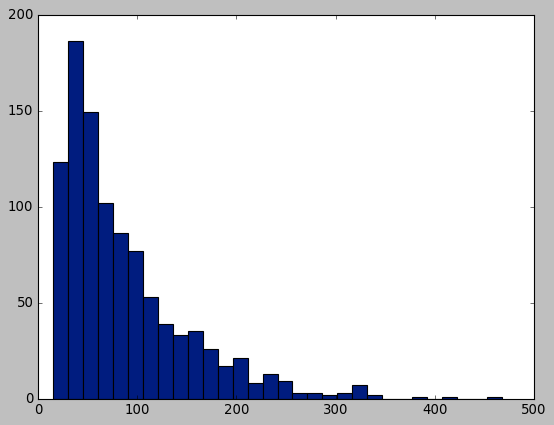

In [82]:
# This dictionary stores the chutes and ladders board.
CandLTable2 = {4:14, 9:31, 16:6, 21:42, 36:44, 47:26, 49:11, 51:67,
             56:53, 63:19, 64:60, 80:2, 87:24, 93:73, 95:75, 98:78}

Ngames = 1000
Np1wins = 0
Np2wins = 0

GameLengths = np.array([])

for k in range(Ngames):
    L = CandL_play_a_game(CandLTable2)
    Np1wins += L[1]
    Np2wins += L[2]
    GameLengths = np.append(GameLengths, L[0])
    
print('Average number of rounds per game is {:.2f}'.format(np.mean(GameLengths)))
print('Player 1 won {} of {} games'.format(Np1wins,Ngames))
print('Player 2 won {} of {} games'.format(Np2wins,Ngames))

plt.hist(GameLengths, bins=30)